In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## ZORI

In [2]:
zori = pd.read_csv('./data/cleandata/clean_zori.csv').drop('Unnamed: 0', axis = 1)

In [104]:
print(f"Data contains {pd.unique(zori['ZipCode']).shape[0]} unique zipcodes.")
print(f"Data contains {pd.unique(zori['County'] + ', ' + zori['State']).shape[0]} unique counties.")

Data contains 3264 unique zipcodes.
Data contains 313 unique counties.


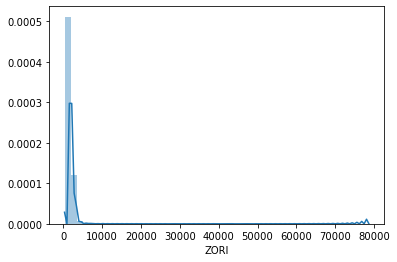

In [18]:
sns.distplot(zori['ZORI']); #Skewed right, i.e., a lot of outliers

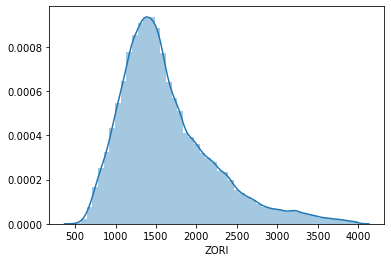

In [12]:
sns.distplot(zori[zori['ZORI'] <= 4000]['ZORI']);

In [85]:
print(f"Out of {zori.shape[0]} ZORI rows, {zori[zori['ZORI'] <= 4000].shape[0]} were less than $4,000.")

Out of 261120 ZORI rows, 247054 were less than $4,000.


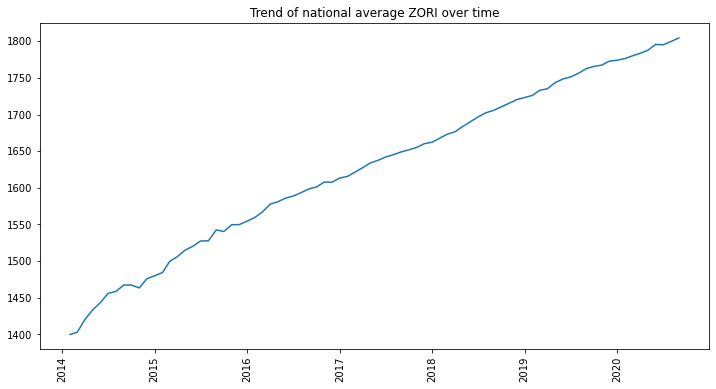

In [65]:
temp = zori[zori['ZORI'] <= 4000].groupby(['Year', 'Month']).mean()['ZORI'].reset_index()
temp['Year_Month'] = temp['Year'].map(str) + '_' + temp['Month'].map(str)
temp['Year_Month'] = pd.to_datetime(temp['Year_Month'], format = '%Y_%m')
temp = temp[['Year_Month', 'ZORI']]
plt.figure(figsize = (12, 6))
plt.plot(temp['Year_Month'], temp['ZORI'])
plt.xticks(rotation = 90)
plt.title('Trend of national average ZORI over time');

## ZHVI

In [66]:
zhvi = pd.read_csv('./data/cleandata/clean_zhvi.csv').drop('Unnamed: 0', axis = 1)

In [105]:
print(f"Data contains {pd.unique(zhvi['ZipCode']).shape[0]} unique zipcodes.")
print(f"Data contains {pd.unique(zhvi['County'] + ', ' + zhvi['State']).shape[0]} unique counties.")

Data contains 30230 unique zipcodes.
Data contains 2943 unique counties.


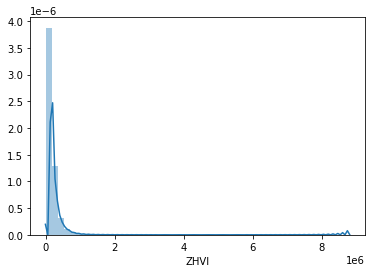

In [67]:
sns.distplot(zhvi['ZHVI']); #Skewed right, i.e., a lot of outliers

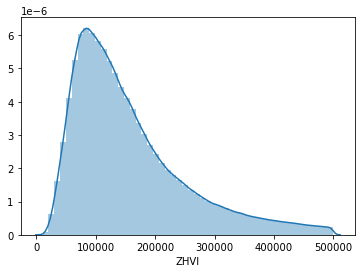

In [69]:
sns.distplot(zhvi[zhvi['ZHVI'] <= 0.5e6]['ZHVI']);

In [84]:
print(f"Out of {zhvi.shape[0]} ZHVI rows, {zhvi[zhvi['ZHVI'] <= 0.5e6].shape[0]} were less than $500,000.")

Out of 9008540 ZHVI rows, 6627611 were less than $500,000.


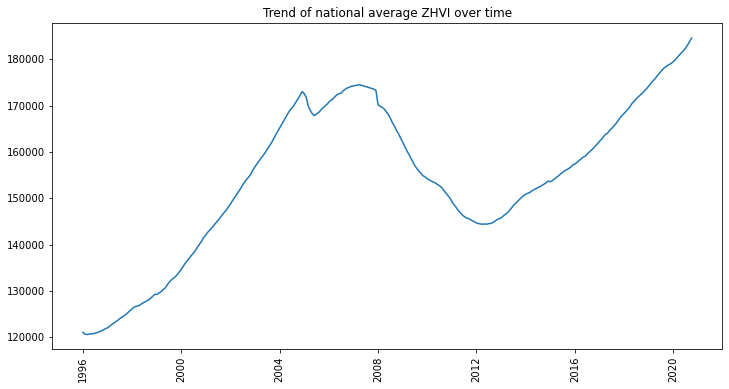

In [86]:
temp = zhvi[zhvi['ZHVI'] <= 0.5e6].groupby(['Year', 'Month']).mean()['ZHVI'].reset_index()
temp['Year_Month'] = temp['Year'].map(str) + '_' + temp['Month'].map(str)
temp['Year_Month'] = pd.to_datetime(temp['Year_Month'], format = '%Y_%m')
temp = temp[['Year_Month', 'ZHVI']]
plt.figure(figsize = (12, 6))
plt.plot(temp['Year_Month'], temp['ZHVI'])
plt.xticks(rotation = 90)
plt.title('Trend of national average ZHVI over time');

## Air Quality

In [87]:
airq = pd.read_csv('./data/cleandata/clean_airq.csv').drop('Unnamed: 0', axis = 1)

In [107]:
print(f"Data contains {pd.unique(airq['County'] + ', ' + airq['State']).shape[0]} unique counties.")

Data contains 1127 unique counties.


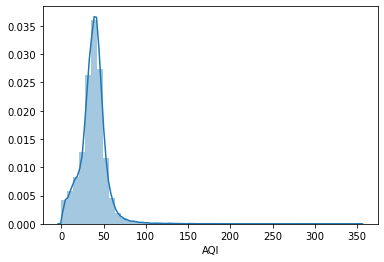

In [109]:
sns.distplot(airq['AQI']); #Skewed right, i.e., a lot of outliers

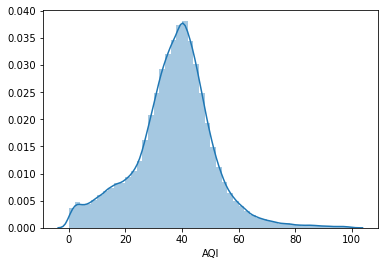

In [110]:
sns.distplot(airq[airq['AQI'] <= 100]['AQI']);

In [111]:
print(f"Out of {airq.shape[0]} AQI rows, {airq[airq['AQI'] <= 100].shape[0]} were less than 100.")

Out of 80041 AQI rows, 79687 were less than 100.


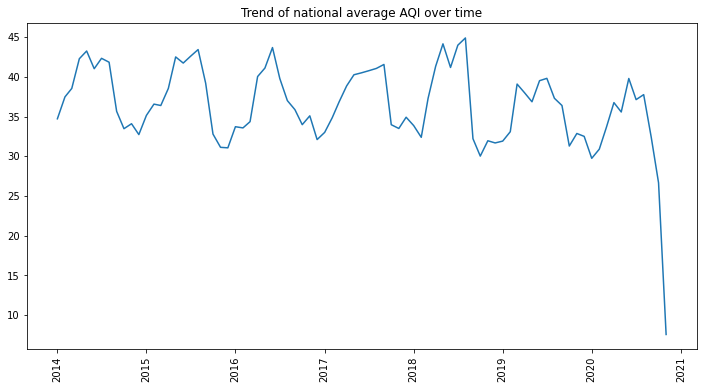

In [112]:
temp = airq[airq['AQI'] <= 100].groupby(['Year', 'Month']).mean()['AQI'].reset_index()
temp['Year_Month'] = temp['Year'].map(str) + '_' + temp['Month'].map(str)
temp['Year_Month'] = pd.to_datetime(temp['Year_Month'], format = '%Y_%m')
temp = temp[['Year_Month', 'AQI']]
plt.figure(figsize = (12, 6))
plt.plot(temp['Year_Month'], temp['AQI'])
plt.xticks(rotation = 90)
plt.title('Trend of national average AQI over time');

## Population

In [117]:
population = pd.read_csv('./data/cleandata/clean_population.csv').drop('Unnamed: 0', axis = 1)

In [119]:
print(f"Data contains {pd.unique(population['County'] + ', ' + population['State']).shape[0]} unique counties.")

Data contains 842 unique counties.


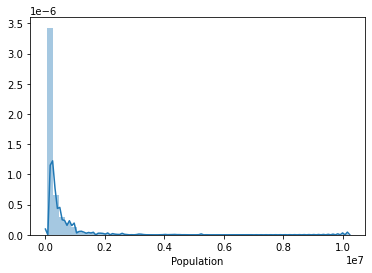

In [121]:
sns.distplot(population['Population']); #Skewed right, i.e., a lot of outliers

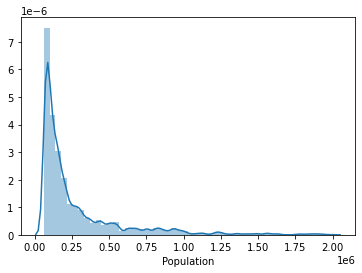

In [123]:
sns.distplot(population[population['Population'] <= 0.2e7]['Population']);

In [131]:
print(f"Out of {population.shape[0]} population rows, {population[population['Population'] <= 0.2e7].shape[0]}\
 were less than 200,000.")

Out of 69900 population rows, 68706 were less than 200,000.


In [148]:
temp.groupby('Year').last().reset_index().drop('Month', axis = 1)

,Year,Population
0,2013,267573489.0
1,2014,270264030.0
2,2015,272896081.0
3,2016,274651450.0
4,2017,277567861.0
5,2018,278949129.0
6,2019,280149385.0


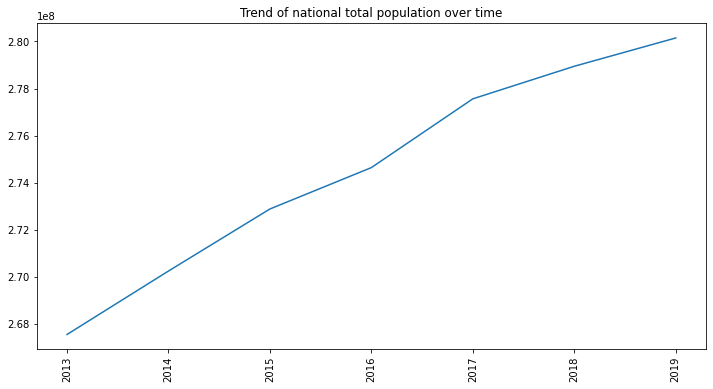

In [152]:
temp = population.groupby(['Year', 'Month']).sum()['Population'].reset_index()
temp = temp.groupby('Year').last().reset_index().drop('Month', axis = 1)
plt.figure(figsize = (12, 6))
plt.plot(temp['Year'], temp['Population'])
plt.xticks(rotation = 90)
plt.title('Trend of national total population over time');

## PCE

In [3]:
pce = pd.read_csv('./data/cleandata/clean_pce.csv').drop('Unnamed: 0', axis = 1)

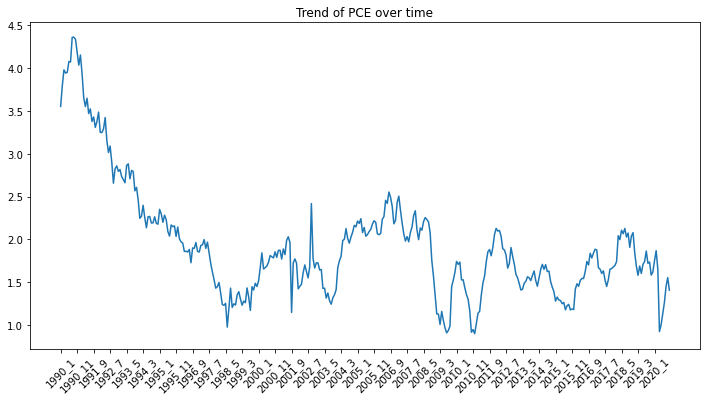

In [28]:
plt.figure(figsize = (12, 6))
plt.plot(pce['Year_Month'], pce['PCE'])
plt.xticks(ticks = [pce['Year_Month'][i] for i in pce['Year_Month'].index if i % 10 == 0], rotation = 45)
plt.title('Trend of PCE over time');